In [235]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Dados de entrada
raio_estaca = 0.5
distancia = raio_estaca * 2.5
largura = 6
altura = 3
n_estacas = int(4)
n_estacas_centrais = int(round(2))
L_estacas = 20
#d_dolphins_embarcação = largura + 5

#Angulos
#Para as inclinações verticais de todas as estacas, temos 90 graus, 1/10, 1/8, 1/6, 1/5, 1/4:
angulos_1=[-90, -84.29, -82.87, -80.54, -78.69, -75.96]
#Para as estacas centrais, os angulos horizontais são 180 e -180
angulos_2=[0, 180]

def gerar_pontos(n, k):
    pontos = []
    tentativas = 0
    # Gerar n pontos dentro dos limites especificados
    while len(pontos) < n and tentativas < 1000000:
        x = round(random.uniform(raio_estaca, largura - raio_estaca), 1)
        y = round(random.uniform(raio_estaca, altura - raio_estaca), 1)
        z = 0
        ponto = (x, y, z)
        if todos_os_pontos_distancia_minima(ponto, pontos):
            pontos.append(ponto)
            tentativas = 0
        else:
            tentativas += 1
    pontos.sort(key=lambda x: x[0])
    
    # Gerar k pontos adicionais para o centro do dolphin
    for _ in range(k):
        x = round(random.uniform(raio_estaca, largura - raio_estaca), 1)
        y = 0
        z = 0
        ponto = (x, y, z)
        # Verificar se o ponto mantém a distância mínima em relação a todos os pontos já existentes
        if todos_os_pontos_distancia_minima(ponto, pontos):
            pontos.append(ponto)
        else:
            tentativas += 1
    if len(pontos) < n + k:
        print("NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.")
        return []
  
    # Organizar os pontos em ordem crescente de x. Fiz dessa forma para garantir que teremos uma ordem coerente para avaliar os pontos quando aplicar o ML
    pontos[len(pontos) - k:] = sorted(pontos[len(pontos) - k:], key=lambda x: x[0])

    return pontos

def todos_os_pontos_distancia_minima(ponto, pontos):
    for p in pontos:
        if distancia_entre_pontos(p, ponto) < distancia:
            return False
    return True

def distancia_entre_pontos(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

def espelhar_pontos(pontos):
    espelho = [(x, -y , z) for x, y , z in pontos[:-int(n_estacas_centrais)]]
    return espelho

In [236]:
def funcao_Objetivo(n, k):
    i = 0
    pontos_iniciais = []
    
    while i < 10000 and not pontos_iniciais:
        pontos = gerar_pontos(n, k)
        espelhos = espelhar_pontos(pontos)
        pontos_iniciais = pontos + espelhos
        
        if pontos_iniciais:
            df = pd.DataFrame(pontos_iniciais, columns=['X', 'Y', 'Z'])
            print(df)
            print(pontos_iniciais)
            pontos_espelho = pontos + espelhos
            
        
        i += 1
    
    return pontos_iniciais,pontos_espelho,pontos

# Uso da função funcao_Objetivo
pontos_iniciais,pontos_espelho,pontos = funcao_Objetivo(int(n_estacas), int(n_estacas_centrais))


NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.
     X    Y  Z
0  0.8  0.7  0
1  2.7  1.2  0
2  3.9  2.3  0
3  5.4  1.3  0
4  3.1  0.0  0
5  5.1  0.0  0
6  0.8 -0.7  0
7  2.7 -1.2  0
8  3.9 -2.3  0
9  5.4 -1.3  0
[(0.8, 0.7, 0), (2.7, 1.2, 0), (3.9, 2.3, 0), (5.4, 1.3, 0), (3.1, 0, 0), (5.1, 0, 0), (0.8, -0.7, 0), (2.7, -1.2, 0), (3.9, -2.3, 0), (5.4, -1.3, 0)]


In [237]:
def gerar_angulos_aleatorios_verticais(n_estacas,n_estacas_centrais):
    #Gerar angulos aleatorios para as estacas laterais
    angulos_aleatorios = np.random.choice(angulos_1, size=n_estacas)
    #Gerar angulos aleatorios para as estacas centrais
    angulo_central_aleatorio = np.random.choice(angulos_1, size=n_estacas_centrais)
    angulos_verticais_theta= np.concatenate((angulos_aleatorios,angulo_central_aleatorio, angulos_aleatorios))
    return angulos_verticais_theta

def gerar_angulos_aleatorios_horizontais(n_estacas,n_estacas_centrais):
    ang_limite_horizontal = 360
    angulos_aleatorios = np.round(np.random.uniform(0,ang_limite_horizontal, size=n_estacas),2)
    angulo_central_aleatorio = np.random.choice(angulos_2, size=n_estacas_centrais)
    angulos_horizontais_theta = np.concatenate((angulos_aleatorios,angulo_central_aleatorio, -1*angulos_aleatorios))
    return angulos_horizontais_theta

angulos_horizontais_theta = gerar_angulos_aleatorios_horizontais(int(n_estacas),int(n_estacas_centrais))
angulos_verticais_theta = gerar_angulos_aleatorios_verticais(int(n_estacas),int(n_estacas_centrais))

#Angulos verticais
df = pd.DataFrame(angulos_verticais_theta, columns=['Ângulos Verticais'])
print(df)

#Angulos horizontais
df = pd.DataFrame(angulos_horizontais_theta, columns=['Ângulos Horizontais'])
print(df)

   Ângulos Verticais
0             -75.96
1             -90.00
2             -84.29
3             -80.54
4             -78.69
5             -84.29
6             -75.96
7             -90.00
8             -84.29
9             -80.54
   Ângulos Horizontais
0               198.74
1               328.67
2               307.49
3               100.16
4                 0.00
5               180.00
6              -198.74
7              -328.67
8              -307.49
9              -100.16


In [238]:
L_estacas = 20

def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    # Converter os ângulos de graus para radianos
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    # Calcular os componentes do vetor nas direções X, Y e Z
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)
    # Calcular as coordenadas finais
    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

def gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta):
    coordenadas_finais = []
    # Iterar por cada ponto inicial e seus ângulos correspondentes
    for i in range(len(pontos)):
        x, y, z = pontos[i]
        theta_v, theta_h = angulos_verticais_theta[i], angulos_horizontais_theta[i]
        x_final, y_final, z_final = spherical_to_cartesian(x, y, z, L_estacas, theta_v, theta_h)
        
        coordenadas_finais.append((round(x_final,2), round(y_final,2), round(z_final,2)))
    return coordenadas_finais

def espelhar_pontos(pontos, k):
    espelho = []
    # Calcular os pontos espelhados, exceto para os últimos k pontos relacionados às estacas centrais
    for (x, y, z) in pontos[:-k]:
        y_espelhado = -y
        espelho.append((x, y_espelhado, z))
    return espelho

# Calcular as coordenadas finais para cada ponto inicial
coordenadas_finais = gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta)
espelhos_finais = espelhar_pontos(coordenadas_finais, int(n_estacas_centrais))
pontos_finais = np.array(coordenadas_finais + espelhos_finais)

#Coordenadas iniciais 
df = pd.DataFrame(pontos_iniciais, columns=['X', 'Y', 'Z'])
print("Coordenadas iniciais:")
print(df)


df = pd.DataFrame(pontos_finais, columns=['X', 'Y', 'Z'])
#Definir o titulo da tabela
print("Coordenadas finais prévias:")
print(df)

Coordenadas iniciais:
     X    Y  Z
0  0.8  0.7  0
1  2.7  1.2  0
2  3.9  2.3  0
3  5.4  1.3  0
4  3.1  0.0  0
5  5.1  0.0  0
6  0.8 -0.7  0
7  2.7 -1.2  0
8  3.9 -2.3  0
9  5.4 -1.3  0
Coordenadas finais prévias:
      X     Y      Z
0 -3.79 -0.86 -19.40
1  2.70  1.20 -20.00
2  5.11  0.72 -19.90
3  4.82  4.54 -19.73
4  7.02  0.00 -19.61
5  3.11  0.00 -19.90
6 -3.79  0.86 -19.40
7  2.70 -1.20 -20.00
8  5.11 -0.72 -19.90
9  4.82 -4.54 -19.73


Esse é um print prévio de como as estacas estão posicionadas antes da otimizaçao, irei retirar ele posteriormente.
Escolhi a metodologia de gerar pontos aleatórios e depois ajustálos conforme as exigências

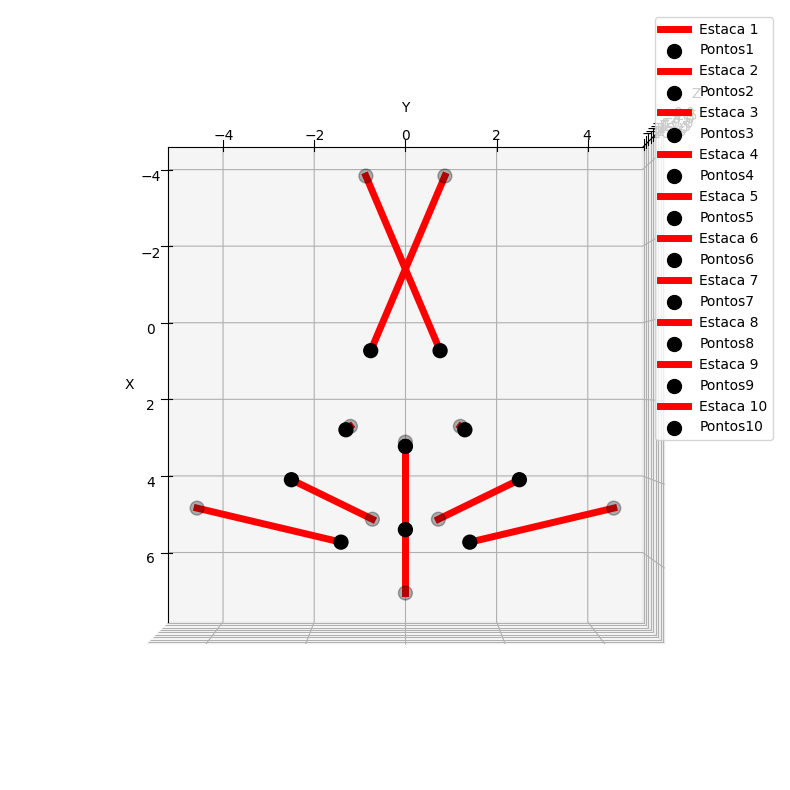

In [239]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_estacas(pontos_finais, pontos_iniciais, tube_radius=5):
    # Configurar a figura e o eixo 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Iterar por cada estaca com base nos pontos finais e iniciais
    for i, (ponto_final, ponto_inicial) in enumerate(zip(pontos_finais, pontos_iniciais)):
        x_start, y_start, z_start = ponto_inicial
        x_end, y_end, z_end = ponto_final
        
        # Plotar a linha da estaca entre o ponto inicial e final
        ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color='r', linewidth=tube_radius, label=f'Estaca {i + 1}')
        
        # Plotar os pontos iniciais e finais
        ax.scatter([x_start, x_end], [y_start, y_end], [z_start, z_end], color='black', marker='o', s=100, label=f'Pontos{i+1}')

    # Configurar os rótulos dos eixos
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Adicionar uma legenda
    ax.legend()
    
    # Definir a visualização 3D com uma certa perspectiva
    #ax.view_init(45, 45)
    ax.view_init(90, 0)
    
    plt.show()

# Usar a função para plotar as estacas com base nos pontos finais e iniciais fornecidos
plot_estacas(pontos_finais, pontos_iniciais)

PONTOS: [(0.8, 0.7, 0), (2.7, 1.2, 0), (3.9, 2.3, 0), (5.4, 1.3, 0), (3.1, 0, 0), (5.1, 0, 0)]
COMPRIMENTO DE PONTOS: 6
PONTOS FINAIS: [[ -3.79  -0.86 -19.4 ]
 [  2.7    1.2  -20.  ]
 [  5.11   0.72 -19.9 ]
 [  4.82   4.54 -19.73]
 [  7.02   0.   -19.61]
 [  3.11   0.   -19.9 ]
 [ -3.79   0.86 -19.4 ]
 [  2.7   -1.2  -20.  ]
 [  5.11  -0.72 -19.9 ]
 [  4.82  -4.54 -19.73]]
Comprimento de pontos finais: 10
Analisando o ponto 0 e o ponto 1: distância = 6.84
Analisando o ponto 0 e o ponto 2: distância = 9.05
Analisando o ponto 0 e o ponto 3: distância = 10.17
Analisando o ponto 0 e o ponto 4: distância = 10.85
Analisando o ponto 0 e o ponto 5: distância = 6.97
Analisando o ponto 0 e o ponto 6: distância = 1.72
Novo ângulo vertical para n_estacas : -90.0
Novo ângulo horizontal para n_estacas: 283.17
Value of x: 0.8
Value of y: 0.7
Value of z: -20.0
Analisando o ponto 0 e o ponto 1: distância = 1.96
Novo ângulo vertical para n_estacas : -80.54
Novo ângulo horizontal para n_estacas: 75.15
Va

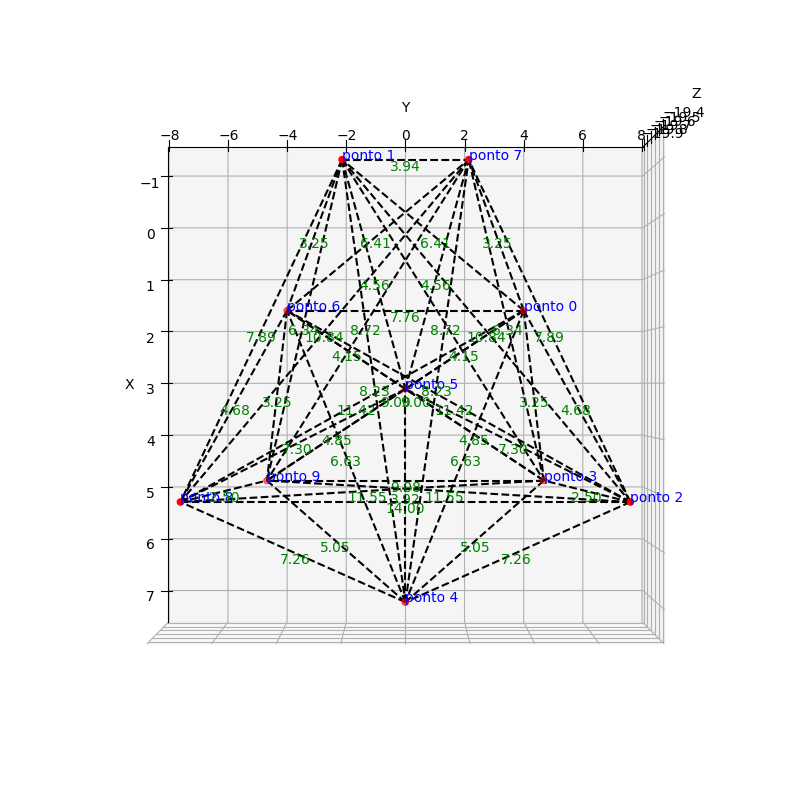

In [240]:
import numpy as np
import math
import pandas as pd

comprimento = 20
distancia_minima = 2.5
angulos_1 = np.array([-90, -84.29, -82.87, -80.54, -78.69, -75.96])
angulos_2 = np.array([0, 180])

def distancia_entre_pontos_r3(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    return round(np.linalg.norm(p2 - p1), 2)

def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    # Converter os ângulos de graus para radianos
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    # Calcular os componentes do vetor nas direções X, Y e Z
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)
    # Calcular as coordenadas finais
    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

def verificar_e_ajustar_pontos(pontos, comprimento, distancia_minima, pontos_finais, max_iteracoes=100000):
    print("PONTOS:", pontos)
    print("COMPRIMENTO DE PONTOS:", len(pontos))
    print("PONTOS FINAIS:", pontos_finais)
    print("Comprimento de pontos finais:", len(pontos_finais))
    
    iteracao = 0  # Contador de iterações para evitar loops infinitos
    copia_pontos_finais = pontos_finais.copy()
    pontos_finais = np.array(pontos_finais)

    for k in range(len(pontos)):
        while True:
            ajustou_ponto = False  # Flag para verificar se o ponto foi ajustado
            for l in range(len(pontos_finais)):
                if k == l:
                    continue
                ponto1 = pontos_finais[k]
                ponto2 = pontos_finais[l]
                dist = distancia_entre_pontos_r3(ponto1, ponto2)
                print(f"Analisando o ponto {k} e o ponto {l}: distância = {dist}")

                if dist < distancia_minima:
                    ajustou_ponto = True
                    # Verificar se o ponto atual é uma estaca central ou não
                    if k < n_estacas:
                        novo_angulo_vertical = np.random.choice(angulos_1)
                        novo_angulo_horizontal = np.round(np.random.uniform(0, 360), 2)
                        print(f"Novo ângulo vertical para n_estacas : {novo_angulo_vertical}")
                        print(f"Novo ângulo horizontal para n_estacas: {novo_angulo_horizontal}")
                    else:
                        novo_angulo_vertical = np.random.choice(angulos_1)
                        novo_angulo_horizontal = np.random.choice(angulos_2)
                        print(f"Novo ângulo vertical n_estacas_centrais: {novo_angulo_vertical}")
                        print(f"Novo ângulo horizontal n_estacas_centrais: {novo_angulo_horizontal}")

                    # Calcular novas coordenadas finais
                    x_novo, y_novo, z_novo = spherical_to_cartesian(pontos[k][0], pontos[k][1], pontos[k][2], comprimento, novo_angulo_vertical, novo_angulo_horizontal)
                    
                    # Arredondar as coordenadas finais
                    x = np.round(x_novo, 2)
                    y = np.round(y_novo, 2)
                    z = np.round(z_novo, 2)
                    print("Value of x:", x)
                    print("Value of y:", y)
                    print("Value of z:", z)

                    # Atualizar as coordenadas finais do ponto original
                    if k < n_estacas:
                        pontos_finais[k, :] = [x, y, z]
                        pontos_finais[k + n_estacas + n_estacas_centrais,:] = [x, -y, z]
                    else:
                        pontos_finais[k, :] = [x, y, z]
                    break

            if not ajustou_ponto:
                print(f"Coordenada inicial do ponto {k}: {copia_pontos_finais[k]}")
                print(f"Coordenada final do ponto {k}: {pontos_finais[k]}")
                break
            iteracao += 1
            if iteracao >= max_iteracoes:
                print(f"Número máximo de iterações atingido. Há pontos não ajustados. Último ponto ajustado: {k}")
                return pontos_finais
    return pontos_finais

# Exemplo de uso:
pontos_finais_ajustados = verificar_e_ajustar_pontos(pontos, comprimento, distancia_minima, pontos_finais)

# Exibir os pontos finais ajustados
df = pd.DataFrame(pontos_finais_ajustados, columns=['X', 'Y', 'Z'])
print(df)

# Calcular e imprimir as distâncias entre os pontos finais
for i in range(len(pontos_finais_ajustados)):
    for j in range(i + 1, len(pontos_finais_ajustados)):
        ponto1 = pontos_finais_ajustados[i]
        ponto2 = pontos_finais_ajustados[j]
        dist = distancia_entre_pontos_r3(ponto1, ponto2)
        print(f"Distância entre ponto {i} e ponto {j}: {dist}")

#Scatter plot 3d dos pontos finais
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def exibir_pontos_finais(pontos_finais_ajustados):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    xs = [p[0] for p in pontos_finais_ajustados]
    ys = [p[1] for p in pontos_finais_ajustados]
    zs = [p[2] for p in pontos_finais_ajustados]
    
    ax.scatter(xs, ys, zs, c='r', marker='o')
    for i, (x, y, z) in enumerate(pontos_finais_ajustados):
        ax.text(x, y, z, f'ponto {i}', color='blue', fontsize=10)

    # Plotar linhas entre os pontos com a respectiva distância
    for i in range(len(pontos_finais_ajustados)):
        for j in range(i+1, len(pontos_finais_ajustados)):
            x1, y1, z1 = pontos_finais_ajustados[i]
            x2, y2, z2 = pontos_finais_ajustados[j]
            ax.plot([x1, x2], [y1, y2], [z1, z2], 'k--')
            dist = distancia_entre_pontos_r3(pontos_finais_ajustados[i], pontos_finais_ajustados[j])
            ax.text((x1 + x2) / 2, (y1 + y2) / 2, (z1 + z2) / 2, f'{dist:.2f}', fontsize=10, color='green', ha='center', va='top')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.view_init(90, 0)
    
    plt.show()
exibir_pontos_finais(pontos_finais_ajustados)

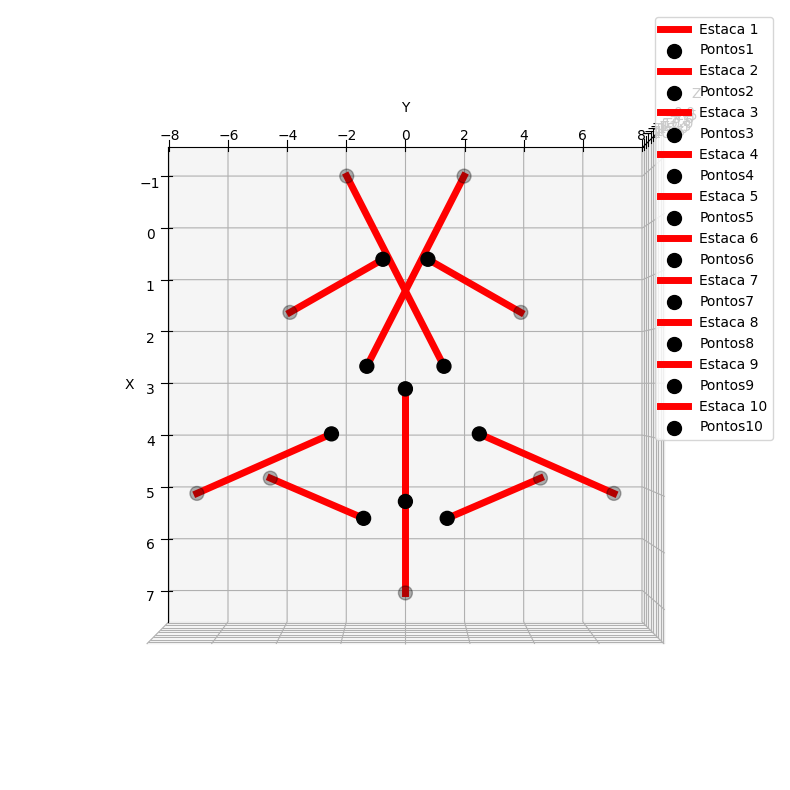

comprimento do array de pontos finais: 10
comprimento do array de pontos iniciais: 10


In [241]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_estacas(pontos_finais_ajustados, pontos_iniciais, tube_radius=5):
    # Configurar a figura e o eixo 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Iterar por cada estaca com base nos pontos finais e iniciais
    for i, (ponto_final, ponto_inicial) in enumerate(zip(pontos_finais_ajustados, pontos_iniciais)):
        x_start, y_start, z_start = ponto_inicial
        x_end, y_end, z_end = ponto_final
        
        # Plotar a linha da estaca entre o ponto inicial e final
        ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color='r', linewidth=tube_radius, label=f'Estaca {i + 1}')
        
        # Plotar os pontos iniciais e finais
        ax.scatter([x_start, x_end], [y_start, y_end], [z_start, z_end], color='black', marker='o', s=100, label=f'Pontos{i+1}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    
    # Definir a visualização 3D com uma certa perspectiva
    #ax.view_init(45, 45)
    ax.view_init(90, 0)
    
    plt.show()
plot_estacas(pontos_finais_ajustados, pontos_iniciais)

print("comprimento do array de pontos finais:", len(pontos_finais))
print("comprimento do array de pontos iniciais:", len(pontos_iniciais))

In [242]:
import numpy as np

# Função para calcular a distância euclidiana entre dois pontos em R3
def distancia_entre_pontos_r3(p1, p2):
    return np.linalg.norm(p1 - p2)

# Função para converter coordenadas esféricas para cartesianas
def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)

    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

# Função para ajustar os pontos finais com base nas distâncias mínimas
def verificar_e_ajustar_pontos(pontos, comprimento, distancia_minima, pontos_finais, max_iteracoes=100000):
    iteracao = 0  # Contador de iterações para evitar loops infinitos
    copia_pontos_finais = pontos_finais.copy()
    pontos_finais = np.array(pontos_finais)

    for k in range(len(pontos)):
        while True:
            ajustou_ponto = False  # Flag para verificar se o ponto foi ajustado
            ponto_atual = pontos_finais[k]

            for l in range(len(pontos_finais)):
                if k == l:
                    continue
                ponto1 = pontos_finais[k]
                ponto2 = pontos_finais[l]
                dist = distancia_entre_pontos_r3(ponto1, ponto2)
                if dist < distancia_minima:
                    ajustou_ponto = True
                    novo_angulo_vertical = np.random.uniform(0, 180)
                    novo_angulo_horizontal = np.random.uniform(0, 360)

                    x_novo, y_novo, z_novo = spherical_to_cartesian(
                        pontos[k][0], pontos[k][1], ponto_atual[2],
                        comprimento, novo_angulo_vertical, novo_angulo_horizontal
                    )
                    
                    x = np.round(x_novo, 2)
                    y = np.round(y_novo, 2)
                    z = np.round(z_novo, 2)

                    pontos_finais[k, :] = [x, y, z]
                    break

            if not ajustou_ponto:
                break

            iteracao += 1
            if iteracao >= max_iteracoes:
                return pontos_finais

    return pontos_finais

# Função principal para encontrar a menor distância entre os vetores parametrizados
def encontrar_menor_distancia(pontos_iniciais, pontos_finais, M=20):
    vetores = pontos_finais - pontos_iniciais
    vetores_divididos = vetores / M

    menor_distancia = float('inf')
    ponto_menor_distancia_v1 = None
    ponto_menor_distancia_v2 = None
    N_v1 = None
    N_v2 = None

    for i in range(len(pontos_iniciais)):
        for j in range(len(pontos_iniciais)):
            if i != j:
                for N1 in range(1, M):
                    for N2 in range(1, M):
                        ponto_v1 = pontos_iniciais[i] + N1 * vetores_divididos[i]
                        ponto_v2 = pontos_iniciais[j] + N2 * vetores_divididos[j]
                        dist = distancia_entre_pontos_r3(ponto_v1, ponto_v2)
                        if dist < menor_distancia:
                            menor_distancia = dist
                            ponto_menor_distancia_v1 = ponto_v1
                            ponto_menor_distancia_v2 = ponto_v2
                            N_v1 = N1
                            N_v2 = N2

    return menor_distancia, ponto_menor_distancia_v1, ponto_menor_distancia_v2, N_v1, N_v2

# Definir os pontos iniciais e finais
pontos_iniciais = np.array([
    [0.9, 1.0, 0],
    [1.3, 2.1, 0],
    [2.7, 2.2, 0],
    [4.2, 1.9, 0],
    [2.4, 0.0, 0],
    [4.5, 0.0, 0],
    [0.9, -1.0, 0],
    [1.3, -2.1, 0],
    [2.7, -2.2, 0],
    [4.2, -1.9, 0]
])

pontos_finais = np.array([
    [-0.27, 2.61, -19.90],
    [0.98, 6.94, -19.40],
    [5.96, 4.38, -19.61],
    [4.20, 1.90, -20.00],
    [2.40, 0.00, -20.00],
    [6.49, 0.00, -19.90],
    [-0.27, -2.61, -19.90],
    [0.98, -6.94, -19.40],
    [5.96, -4.38, -19.61],
    [4.20, -1.90, -20.00]
])

# Parâmetros da busca
distancia_minima = 1.0
comprimento = 20.0

# Encontrar a menor distância entre os vetores parametrizados
menor_distancia, ponto_v1, ponto_v2, N_v1, N_v2 = encontrar_menor_distancia(pontos_iniciais, pontos_finais, M=20)

print(f'A menor distância é {menor_distancia}')
print(f'Ocorre entre os pontos {ponto_v1} e {ponto_v2}')
print(f'Para N_v1 = {N_v1} e N_v2 = {N_v2}')

# Ajustar pontos finais com base na distância mínima
pontos_finais_ajustados = verificar_e_ajustar_pontos(pontos_iniciais, comprimento, distancia_minima, pontos_finais)

print("Pontos finais ajustados:")
print(pontos_finais_ajustados)


A menor distância é 1.092133805904753
Ocorre entre os pontos [ 3.515   2.745  -4.9025] e [ 4.2  1.9 -5. ]
Para N_v1 = 5 e N_v2 = 5
Pontos finais ajustados:
[[ -0.27   2.61 -19.9 ]
 [  0.98   6.94 -19.4 ]
 [  5.96   4.38 -19.61]
 [  4.2    1.9  -20.  ]
 [  2.4    0.   -20.  ]
 [  6.49   0.   -19.9 ]
 [ -0.27  -2.61 -19.9 ]
 [  0.98  -6.94 -19.4 ]
 [  5.96  -4.38 -19.61]
 [  4.2   -1.9  -20.  ]]
